In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Mapas
import folium
from folium.plugins import HeatMap 
from folium import plugins


In [ ]:
# Carregando os conjuntos de dados do diretório do e-commerce em variáveis individuais para facilitar a manipulação.

diretorio_ecommerce = 'brazilian_ecommerce/'
df_item = pd.read_csv(diretorio_ecommerce + "olist_order_items_dataset.csv")
df_reviews = pd.read_csv(diretorio_ecommerce + "olist_order_reviews_dataset.csv")
df_orders = pd.read_csv(diretorio_ecommerce + "olist_orders_dataset.csv")
df_products = pd.read_csv(diretorio_ecommerce + "olist_products_dataset.csv")
df_geolocation = pd.read_csv(diretorio_ecommerce + "olist_geolocation_dataset.csv")
df_sellers = pd.read_csv(diretorio_ecommerce + "olist_sellers_dataset.csv")
df_order_pay = pd.read_csv(diretorio_ecommerce + "olist_order_payments_dataset.csv")
df_customers = pd.read_csv(diretorio_ecommerce + "olist_customers_dataset.csv")
df_category = pd.read_csv(diretorio_ecommerce + "product_category_name_translation.csv")

In [3]:
# Lista de DataFrames, cada um representando um conjunto de dados específico
datasets = [df_customers, df_geolocation, df_orders, df_item, df_order_pay,
            df_reviews, df_products, df_sellers]

# Nomes associados a cada DataFrame para identificação
names = ['df_customer', 'df_geolocation', 'df_orders', 'df_item', 'df_order_pay',
         'df_reviews', 'df_products', 'df_sellers']

# Lista vazia para armazenar informações sobre os conjuntos de dados
data_info = []


# Iteração pelos DataFrames e seus respectivos nomes para coletar informações
for name, df in zip(names, datasets):
    # Coleta de informações sobre cada DataFrame
    info = {
        'conjunto_de_dados': name,
        'n_linhas': df.shape[0],  # Número de linhas no DataFrame
        'n_colunas': df.shape[1],  # Número de colunas no DataFrame
        'quantidade_de_nulos': df.isnull().sum().sum(),  # Quantidade total de valores nulos
        'quantidade_de_colunas_com_nulos': len([col for col, null in df.isnull().sum().items() if null > 0]),  # Número de colunas com valores nulos
        'percentual_de_nulos': df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100,  # Percentual de valores nulos no DataFrame
        'colunas_com_nulos': ', '.join([col for col, null in df.isnull().sum().items() if null > 0])  # Nomes das colunas com valores nulos
    }
    data_info.append(info)  # Adiciona as informações do DataFrame à lista de informações

data_info = pd.DataFrame(data_info)  # Converte a lista de informações em um DataFrame
data_info.style.background_gradient()  # Aplica um estilo visual ao DataFrame para melhorar a visualização


,conjunto_de_dados,n_linhas,n_colunas,quantidade_de_nulos,quantidade_de_colunas_com_nulos,percentual_de_nulos,colunas_com_nulos
0,df_customer,99441,5,0,0,0.000000,
1,df_geolocation,1000163,5,0,0,0.000000,
2,df_orders,99441,8,4908,3,0.616949,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
3,df_item,112650,7,0,0,0.000000,
4,df_order_pay,103886,5,0,0,0.000000,
5,df_reviews,99224,7,145903,2,21.006295,"review_comment_title, review_comment_message"
6,df_products,32951,9,2448,8,0.825468,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,df_sellers,3095,4,0,0,0.000000,


In [4]:
#verificação de onde ta os nulos
nulos_orders = (df_orders.isnull().mean() * 100).round(2).sort_values(ascending=False)
print(nulos_orders)

order_delivered_customer_date    2.98
order_delivered_carrier_date     1.79
order_approved_at                0.16
order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_estimated_delivery_date    0.00
dtype: float64


In [5]:
#remoção dos nulos
df_orders = df_orders.dropna()
df_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [6]:
#verificação de onde ta os nulos
nulos_products = (df_products.isnull().mean() * 100).round(2).sort_values(ascending=False)
print(nulos_products)

product_category_name         1.85
product_name_lenght           1.85
product_description_lenght    1.85
product_photos_qty            1.85
product_weight_g              0.01
product_length_cm             0.01
product_height_cm             0.01
product_width_cm              0.01
product_id                    0.00
dtype: float64


In [7]:
#remoção dos nulos
df_products = df_products.dropna()
df_products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [8]:
#verificação de onde ta os nulos
nulos_reviews = (df_reviews.isnull().mean() * 100).round(2).sort_values(ascending=False)
print(nulos_reviews)

review_comment_title       88.34
review_comment_message     58.70
review_id                   0.00
order_id                    0.00
review_score                0.00
review_creation_date        0.00
review_answer_timestamp     0.00
dtype: float64


In [9]:
#remoção dos nulos, retirando as colunas
df_reviews = df_reviews.drop('review_comment_title', axis=1)
df_reviews = df_reviews.drop('review_comment_message', axis=1)

In [10]:
#verificação se deu certo
df_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [11]:
data_tipo = []

# Iterando pelos DataFrames e coletando informações sobre as colunas e tipos de dados
for name, df in zip(names, datasets):  
    for column, data_type in zip(df.columns, df.dtypes):
        info = {
            'conjunto_de_dados': name, 
            'nome_da_coluna': column,
            'tipo_dos_dados': data_type
        }
        data_tipo.append(info)

# Criando o DataFrame com as informações coletadas
data_tipo = pd.DataFrame(data_tipo)

# Exibindo o DataFrame com informações sobre colunas e tipos de dados
display(data_tipo)

,conjunto_de_dados,nome_da_coluna,tipo_dos_dados
0,df_customer,customer_id,object
1,df_customer,customer_unique_id,object
2,df_customer,customer_zip_code_prefix,int64
3,df_customer,customer_city,object
4,df_customer,customer_state,object
5,df_geolocation,geolocation_zip_code_prefix,int64
6,df_geolocation,geolocation_lat,float64
7,df_geolocation,geolocation_lng,float64
8,df_geolocation,geolocation_city,object
9,df_geolocation,geolocation_state,object


In [12]:
# Transformações para datetime


coluna_datas = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                'order_estimated_delivery_date', 'order_delivered_customer_date']

print(df_orders[coluna_datas].dtypes)

# Aplicar a conversão para datetime
for colunas in coluna_datas:
    df_orders[colunas] = pd.to_datetime(df_orders[colunas])

df_item['shipping_limit_date'] = pd.to_datetime(df_item['shipping_limit_date'])


# Após a conversão
print(df_orders[coluna_datas].dtypes)



order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_estimated_delivery_date    object
order_delivered_customer_date    object
dtype: object


C:\Users\Vini\AppData\Local\Temp\ipykernel_9984\2677237146.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders[colunas] = pd.to_datetime(df_orders[colunas])
C:\Users\Vini\AppData\Local\Temp\ipykernel_9984\2677237146.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders[colunas] = pd.to_datetime(df_orders[colunas])
C:\Users\Vini\AppData\Local\Temp\ipykernel_9984\2677237146.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_delivered_customer_date    datetime64[ns]
dtype: object


C:\Users\Vini\AppData\Local\Temp\ipykernel_9984\2677237146.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders[colunas] = pd.to_datetime(df_orders[colunas])


In [ ]:
# Avaliação das reviews

sns.countplot(x= 'review_score', data = df_reviews)

: 

<Axes: xlabel='payment_type', ylabel='count'>

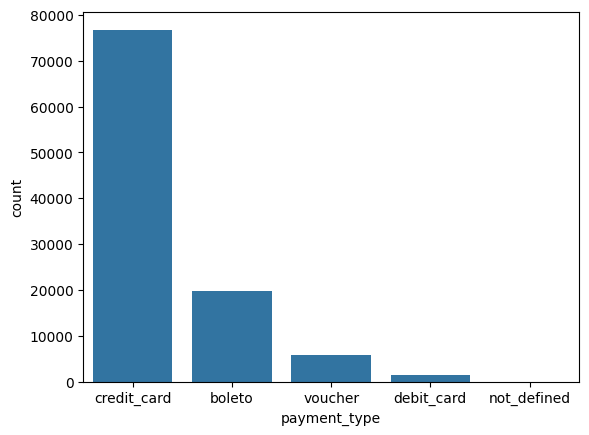

In [14]:
# Avaliação do modo de pagamento

sns.countplot(x= 'payment_type', data = df_order_pay)

In [15]:

# Atributos da data da compra - Ano e Mês
df_orders['ano_da_compra'] = df_orders['order_purchase_timestamp'].dt.year
df_orders['mes_da_compra'] = df_orders['order_purchase_timestamp'].dt.month
df_orders['nome_mes_da_compra'] = df_orders['order_purchase_timestamp'].dt.strftime('%b')
df_orders['ano_e_mes_da_compra'] = df_orders['order_purchase_timestamp'].dt.strftime('%Y%m')
df_orders['data_da_compra'] = df_orders['order_purchase_timestamp'].dt.strftime('%Y%m%d')

# Atributos da data da compra - Dia e Dia da Semana
df_orders['dia_da_compra'] = df_orders['order_purchase_timestamp'].dt.day
df_orders['dia_da_semana_compra'] = df_orders['order_purchase_timestamp'].dt.dayofweek
df_orders['nome_dia_compra'] = df_orders['order_purchase_timestamp'].dt.strftime('%a')

# Atributos da data da compra - Hora e Período do Dia
df_orders['hora_da_compra'] = df_orders['order_purchase_timestamp'].dt.hour
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Madrugada', 'Manhã', 'Tarde', 'Noite']
df_orders['periodo_da_compra'] = pd.cut(df_orders['hora_da_compra'], hours_bins, labels=hours_labels)

# Visualizar o novo DataFrame após as transformações
df_orders.head()



C:\Users\Vini\AppData\Local\Temp\ipykernel_9984\1477464288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['ano_da_compra'] = df_orders['order_purchase_timestamp'].dt.year
C:\Users\Vini\AppData\Local\Temp\ipykernel_9984\1477464288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['mes_da_compra'] = df_orders['order_purchase_timestamp'].dt.month
C:\Users\Vini\AppData\Local\Temp\ipykernel_9984\1477464288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ano_da_compra,mes_da_compra,nome_mes_da_compra,ano_e_mes_da_compra,data_da_compra,dia_da_compra,dia_da_semana_compra,nome_dia_compra,hora_da_compra,periodo_da_compra
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,201710,20171002,2,0,Mon,10,Manhã
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,201807,20180724,24,1,Tue,20,Noite
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,201808,20180808,8,2,Wed,8,Manhã
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,201711,20171118,18,5,Sat,19,Noite
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,201802,20180213,13,1,Tue,21,Noite


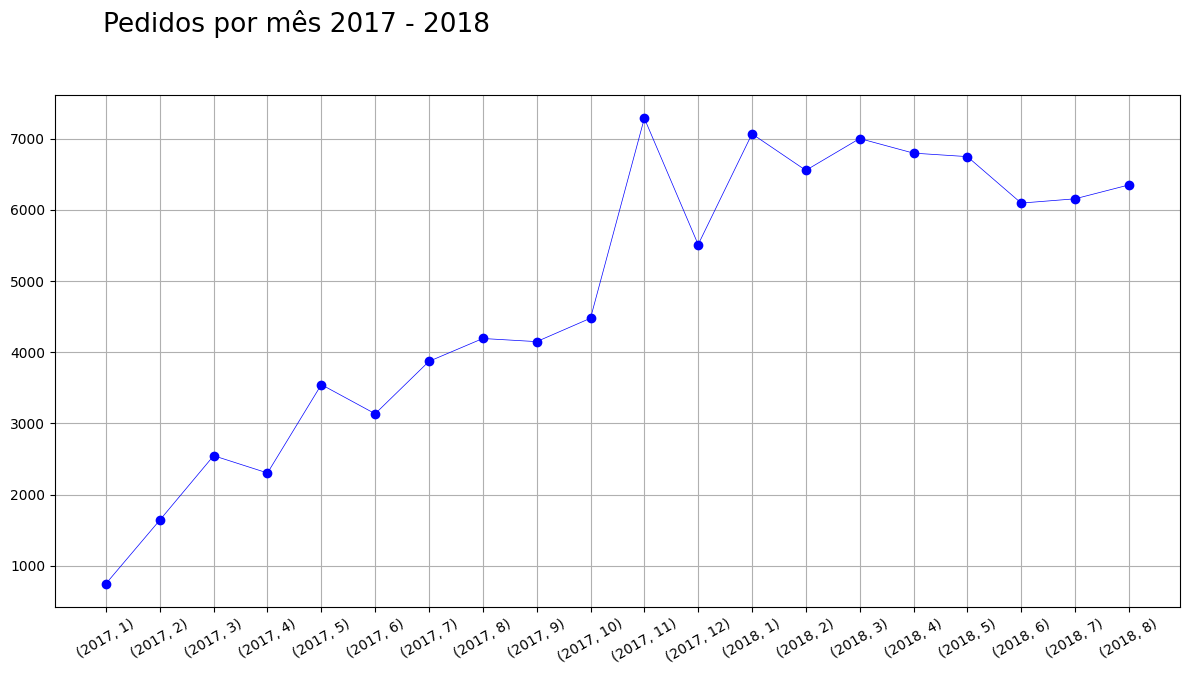

In [16]:
pedidos_mes = df_orders[df_orders['ano_da_compra'] != 2016].groupby(['ano_da_compra', 'mes_da_compra'])['order_id'].nunique()

fig, ax = plt.subplots(figsize=(12, 6))
line = ax.plot([str(idx) for idx in pedidos_mes.index], pedidos_mes, linewidth=0.5, color='blue', marker='o')

fig.text(0.09, 1.08, 'Pedidos por mês 2017 - 2018 ', fontsize=19)
ax.grid(True)

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

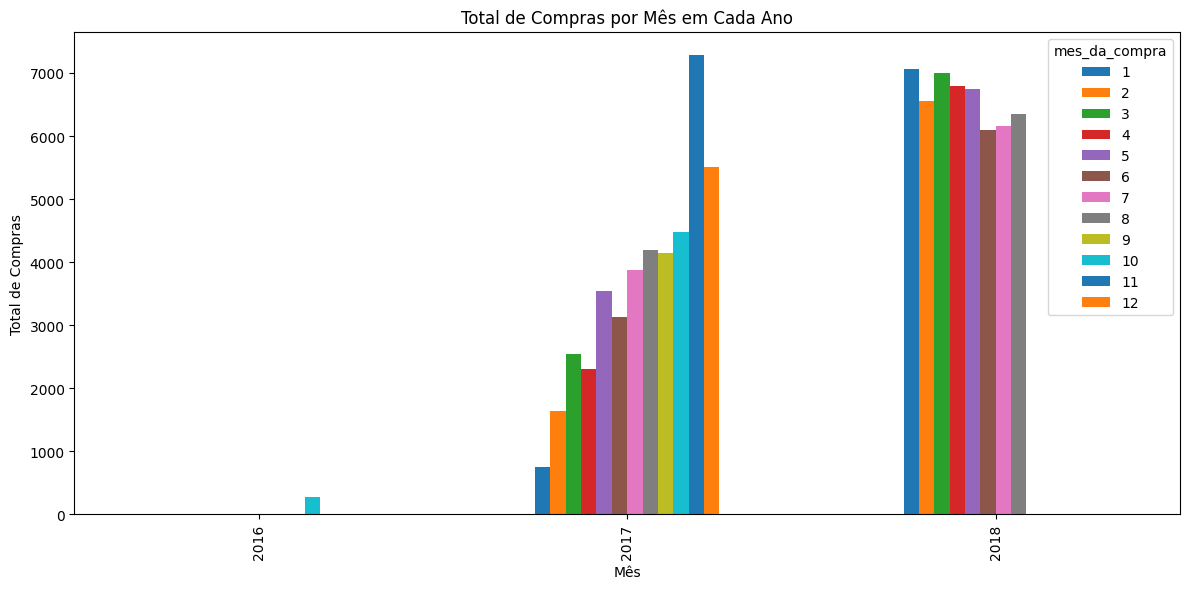

In [17]:
# Total de compras por ano, mês e dia
total_compras_por_ano = df_orders['ano_da_compra'].value_counts().sort_index()
total_compras_por_mes = df_orders.groupby(['ano_da_compra', 'mes_da_compra']).size().unstack().fillna(0)
total_compras_por_dia = df_orders['data_da_compra'].value_counts().sort_index()

# Visualização - Total de compras por mês em cada ano
total_compras_por_mes.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Mês')
plt.ylabel('Total de Compras')
plt.title('Total de Compras por Mês em Cada Ano')
plt.tight_layout()
plt.show()



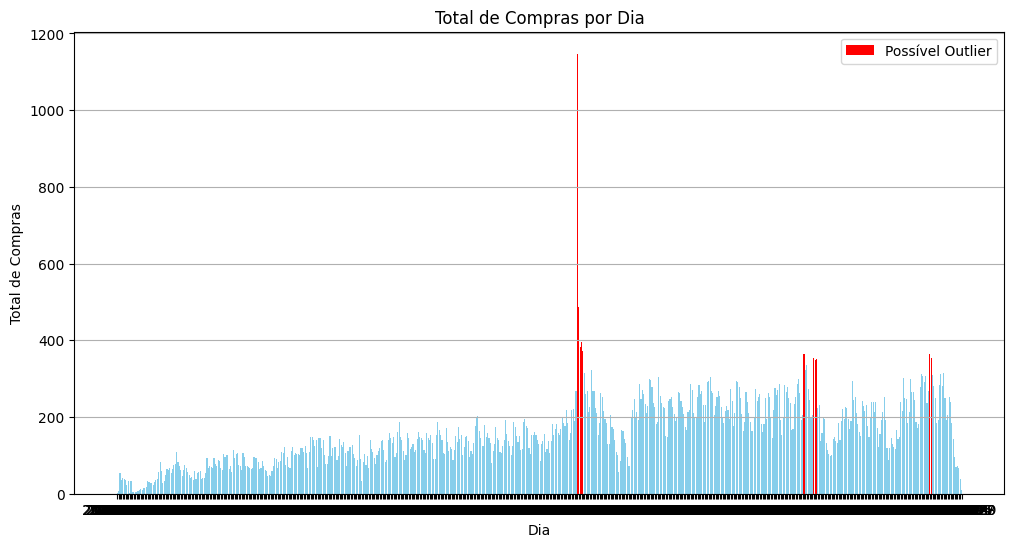

Possíveis outliers:
data_da_compra
20171124    1147
20171125     487
20171126     382
20171127     395
20171128     371
20180507     363
20180514     355
20180515     348
20180516     351
20180806     363
20180807     353
Name: count, dtype: int64


In [18]:
# Definir uma métrica para identificar um possível outlier
limite_outlier = total_compras_por_dia.mean() + 2 * total_compras_por_dia.std()

# Visualização destacando possíveis outliers
plt.figure(figsize=(12, 6))
plt.bar(total_compras_por_dia.index, total_compras_por_dia.values, color='skyblue')
plt.xlabel('Dia')
plt.ylabel('Total de Compras')
plt.title('Total de Compras por Dia')

# Destacar possíveis outliers
outliers = total_compras_por_dia[total_compras_por_dia > limite_outlier]
plt.bar(outliers.index, outliers.values, color='red', label='Possível Outlier')
plt.legend()
plt.grid(axis='y')
plt.show()

# Imprimir os dias possíveis outliers
print("Possíveis outliers:")
print(outliers)


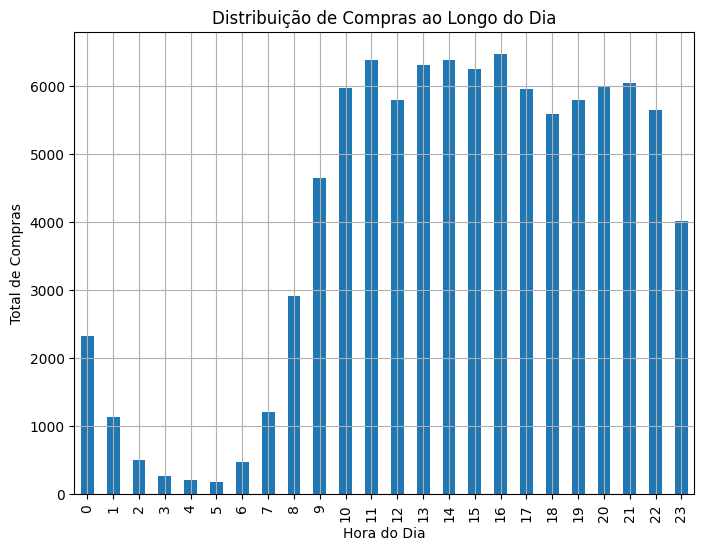

In [19]:
# Distribuição de compras ao longo do dia
compras_por_hora = df_orders['hora_da_compra'].value_counts().sort_index()

# Visualização
plt.figure(figsize=(8, 6))
compras_por_hora.plot(kind='bar')
plt.xlabel('Hora do Dia')
plt.ylabel('Total de Compras')
plt.title('Distribuição de Compras ao Longo do Dia')
plt.grid(True)
plt.show()


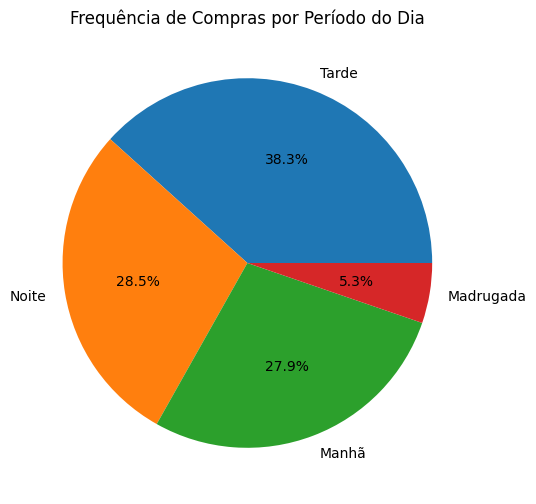

In [20]:
# Frequência de compras por período do dia
frequencia_por_periodo = df_orders['periodo_da_compra'].value_counts()

# Visualização
plt.figure(figsize=(8, 6))
frequencia_por_periodo.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Frequência de Compras por Período do Dia')
plt.show()


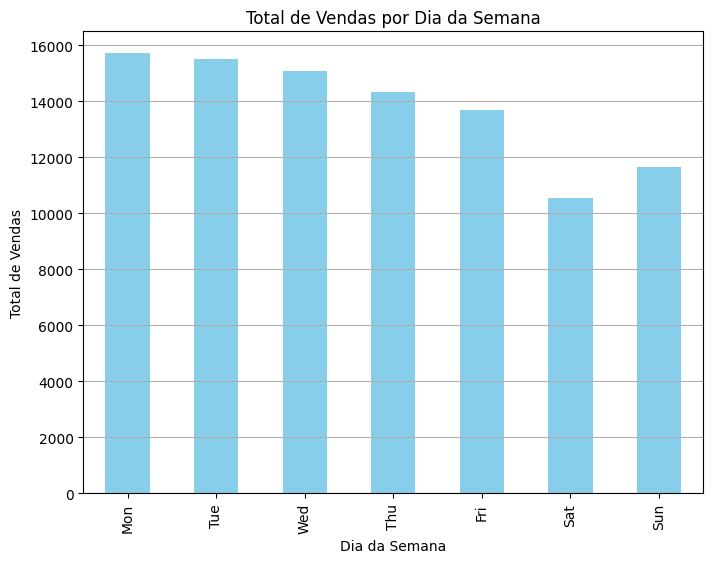

In [21]:
# Total de vendas por dia da semana e em ordem correta
ordem_dias_semana = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
total_vendas_por_dia_semana = df_orders['nome_dia_compra'].value_counts().reindex(ordem_dias_semana)

# Visualização - Total de vendas por dia da semana
plt.figure(figsize=(8, 6))
total_vendas_por_dia_semana.plot(kind='bar', color='skyblue')
plt.xlabel('Dia da Semana')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Dia da Semana')
plt.grid(axis='y')
plt.show()


In [22]:
df_category['product_category_name'].unique()

array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

In [23]:
# Agrupando as categorias
categoria_ampla = {
'Saude e Beleza': ['beleza_saude', 'perfumaria', 'bebes', 'cuidados_pessoais', 'fraldas_higiene'], 
'Tecnologia': ['informatica_acessorios', 'tablets_impressao_imagem', 'telefonia', 'telefonia_fixa', 'consoles_games', 'audio', 'pcs', 'eletronicos', 'eletrodomesticos','eletrodomesticos_2','eletroportateis'], 
'Casa e Decoração': ['cama_mesa_banho', 'moveis_decoracao', 'utilidades_domesticas', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'moveis_escritorio','moveis_colchao_e_estofado', 'moveis_sala', 'moveis_quarto', 'moveis_externos', 'portateis_casa_forno_e_cafe', 'casa_conforto_2', 'casa_conforto', 'climatizacao'],
'Automotivo': ['automotivo'],
'Lazer e Entretenimento': ['esporte_lazer', 'brinquedos', 'instrumentos_musicais', 'cds_dvds_musicais', 'dvds_blu_ray', 'musica', 'artes_e_artesanato', 'artes'],
'Moda': ['fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_roupa_masculina', 'fashion_roupa_feminina', 'fashion_underwear_e_moda_praia', 'Fashion_esporte','fashion_roupa_infanto_juvenil'],
'Culinaria': ['alimentos', 'la_cuisine', 'bebidas', 'flores', 'alimentos_bebidas'], 
'Construção e Jardim': ['ferramentas_jardim', 'construcao_ferramentas_construcao', 'construcao_ferramentas_jardim', 'construcao_ferramentas_iluminacao','Construcao_ferramentas_ferramentas', 'construcao_ferramentas_seguranca', 'casa_construcao'], 
'Livros e Cultura': ['papelaria', 'livros_tecnicos', 'livros_interesse_geral', 'livros_importados'],
'Eventos e Festas': ['relogios_presentes', 'artigos_de_festas', 'artigos_de_natal'],
'Negócio e Servicos': ['market_place', 'industria_comercio_e_negocios', 'agro_industria_e_comercio', 'seguros_e_servicos', 'cine_foto'],
'Sinalização e Segurança': ['sinalizacao_e_seguranca'],
'Petshop': ['pet_shop'],
'Produtos Diversos': ['cool_stuff']
}


# Agrupando as categorias no DataFrame
df_orders['categoria_ampla'] = df_products['product_category_name'].apply(lambda x: next((key for key, value in categoria_ampla.items() if x in value), 'Outros'))

C:\Users\Vini\AppData\Local\Temp\ipykernel_9984\3751342499.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['categoria_ampla'] = df_products['product_category_name'].apply(lambda x: next((key for key, value in categoria_ampla.items() if x in value), 'Outros'))


In [24]:
dados_agrupados = pd.merge(df_orders, df_item, on='order_id', how='left')
dados_agrupados = pd.merge(dados_agrupados, df_products, on='product_id', how='left')
dados_agrupados = pd.merge(dados_agrupados, df_customers, on='customer_id', how='left')
dados_agrupados = pd.merge(dados_agrupados, df_reviews, on='order_id', how='left')


dados_agrupados.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ano_da_compra,mes_da_compra,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,...,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,...,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,...,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,...,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51


C:\Users\Vini\AppData\Local\Temp\ipykernel_9984\1584745091.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_por_categoria_ampla.index, y=contagem_por_categoria_ampla.values, palette='viridis')


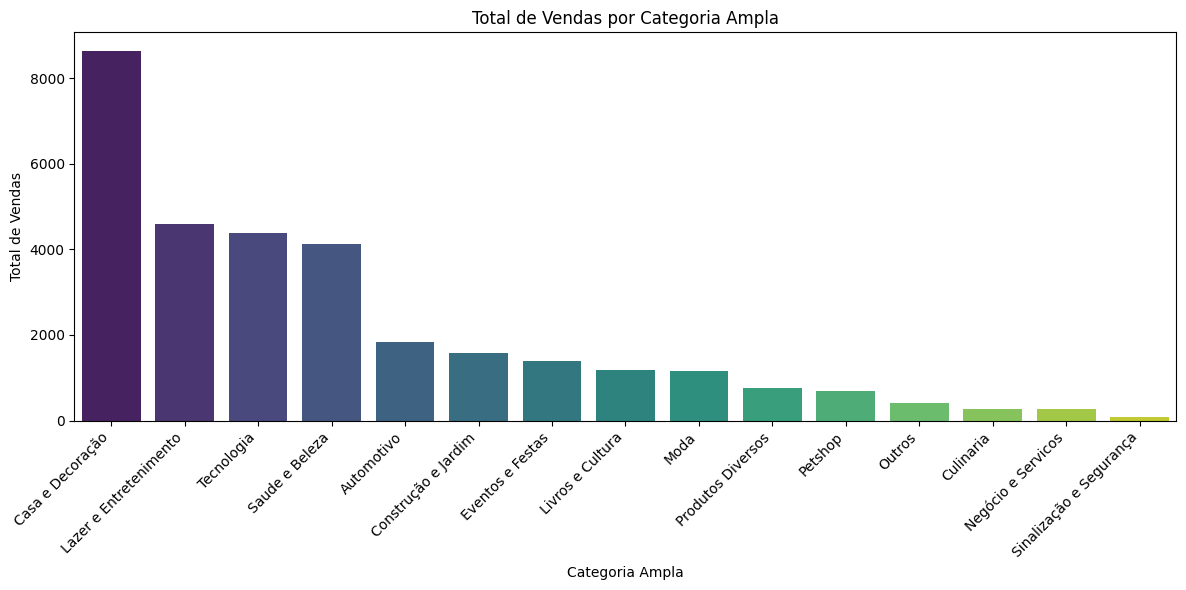

In [25]:
# Contando as ocorrências por categoria ampla
contagem_por_categoria_ampla = df_orders['categoria_ampla'].value_counts()

# Visualização - Total de vendas por categoria ampla
plt.figure(figsize=(12, 6))
sns.barplot(x=contagem_por_categoria_ampla.index, y=contagem_por_categoria_ampla.values, palette='viridis')
plt.xlabel('Categoria Ampla')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Categoria Ampla')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


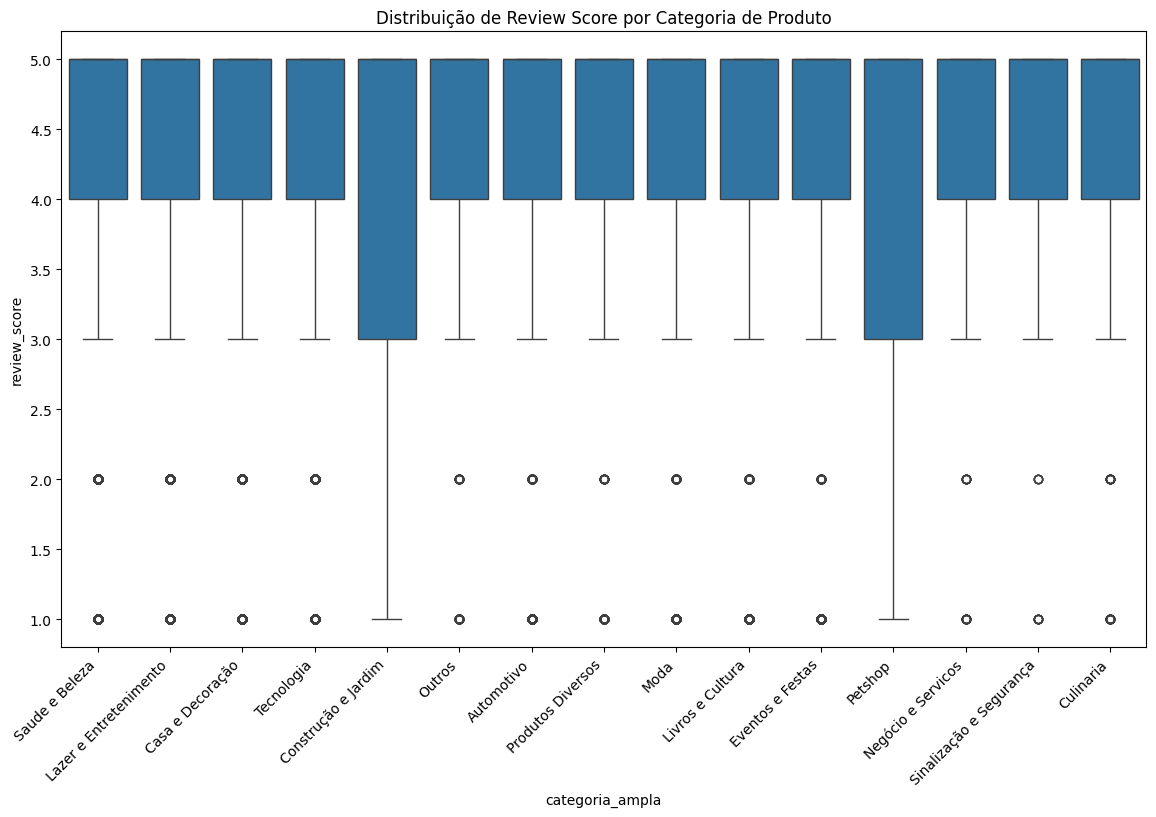

In [26]:
#Avaliações por categoria de produto
plt.figure(figsize=(14, 8))
sns.boxplot(x='categoria_ampla', y='review_score', data=dados_agrupados)
plt.xticks(rotation=45, ha='right')
plt.title('Distribuição de Review Score por Categoria de Produto')
plt.show()

In [27]:
# Encontra os produtos mais vendidos
produtos_mais_vendidos = dados_agrupados['product_id'].value_counts().head(10)

# Cria um DataFrame com 'product_id' e 'count'
produtos_mais_vendidos_df = pd.DataFrame({'product_id': produtos_mais_vendidos.index, 'count': produtos_mais_vendidos.values})

# Junção (merge) para obter 'categoria_ampla' para os produtos mais vendidos
totais_mais_vendidos = pd.merge(produtos_mais_vendidos_df, df_products[['product_id', 'product_category_name']], on='product_id')

# Conta as ocorrências de cada produto
contagem_vendas = totais_mais_vendidos.groupby(['product_id', 'product_category_name']).size().reset_index(name='count')

display(contagem_vendas)

,product_id,product_category_name,count
0,154e7e31ebfa092203795c972e5804a6,beleza_saude,1
1,368c6c730842d78016ad823897a372db,ferramentas_jardim,1
2,389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,1
3,3dd2a17168ec895c781a9191c1e95ad7,informatica_acessorios,1
4,422879e10f46682990de24d770e7f83d,ferramentas_jardim,1
5,53759a2ecddad2bb87a079a1f1519f73,ferramentas_jardim,1
6,53b36df67ebb7c41585e8d54d6772e08,relogios_presentes,1
7,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,1
8,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,1
9,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,1


C:\Users\Vini\AppData\Local\Temp\ipykernel_9984\2825604088.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='count', y='seller_id', data=contagem_vendas.head(10), palette='viridis')


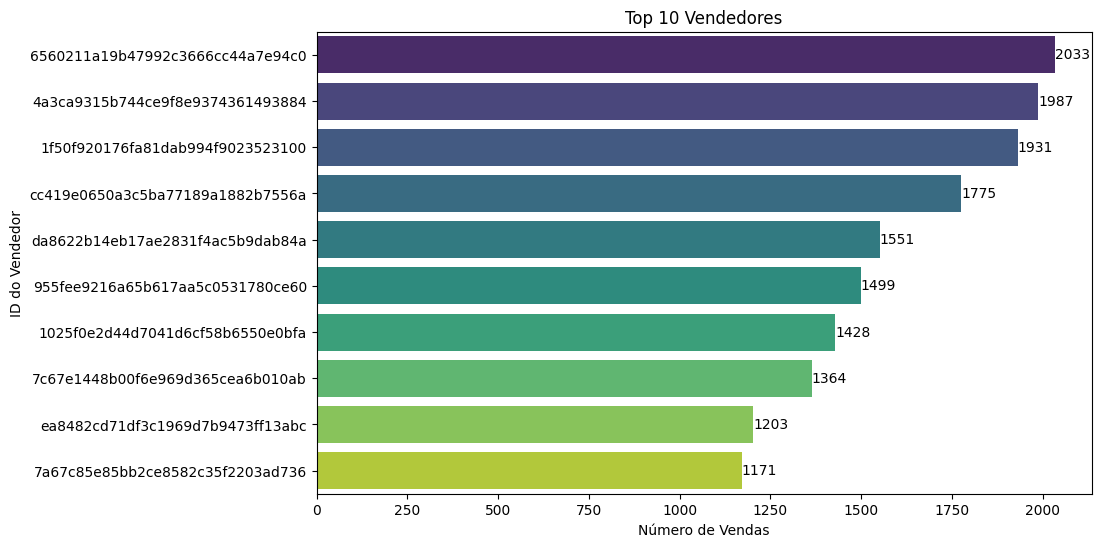

In [28]:
dados_vendas = pd.merge(df_sellers, df_item, on='seller_id', how='left')

# Calcula o número de vendas por vendedor
contagem_vendas = dados_vendas['seller_id'].value_counts().reset_index()
contagem_vendas.columns = ['seller_id', 'count']

# Ordena o DataFrame pelos totais de vendas em ordem decrescente
contagem_vendas = contagem_vendas.sort_values(by='count', ascending=False)

# Cria um gráfico de barras com base no número de vendas
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='count', y='seller_id', data=contagem_vendas.head(10), palette='viridis')

# Adiciona rótulos e título
plt.xlabel('Número de Vendas')
plt.ylabel('ID do Vendedor')
plt.title('Top 10 Vendedores')

# Adiciona as contagens acima das barras
for index, value in enumerate(contagem_vendas['count'].head(10)):
    bar_plot.text(value, index, str(value), ha='left', va='center')

# Mostra o gráfico
plt.show()


In [ ]:
# 2.	Quais são as 10 regiões mais lentas nas entregas? (Associar ao volume de vendas)
# 3.	Em Quais regiões os fretes mais altos estão concentrados? (Essa relação existe?)
# 5.	É viável ter um centro de distribuição?
# 6.	Verificar possível relação entre Frete alto × crescimento do volume de vendas e total de vendedores

C:\Users\Vini\AppData\Local\Temp\ipykernel_9984\3581491790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['delivery_time_difference'] = df_orders['order_estimated_delivery_date'] - df_orders['order_delivered_customer_date']
C:\Users\Vini\AppData\Local\Temp\ipykernel_9984\3581491790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['delivery_status'] = df_orders['delivery_time_difference'].apply(lambda x: 'Atrasado' if x.days < 0 else 'Dentro do Prazo')


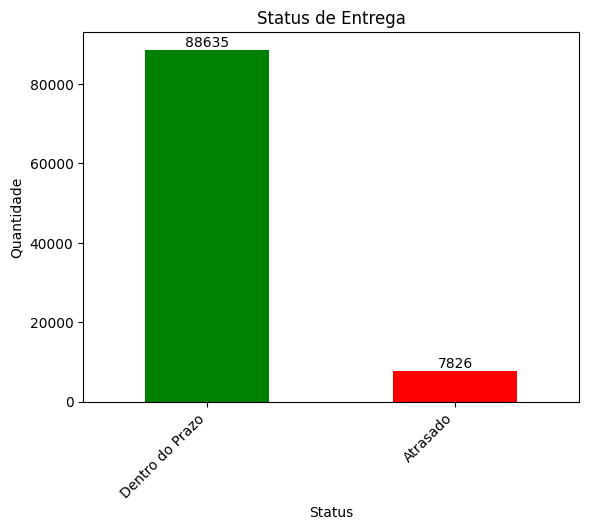

In [38]:
df_orders['delivery_time_difference'] = df_orders['order_estimated_delivery_date'] - df_orders['order_delivered_customer_date']

# Classificar como atrasado (negativo) ou dentro do prazo (positivo)
df_orders['delivery_status'] = df_orders['delivery_time_difference'].apply(lambda x: 'Atrasado' if x.days < 0 else 'Dentro do Prazo')

delivery_counts = df_orders['delivery_status'].value_counts()

delivery_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Status de Entrega')
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')


for i, value in enumerate(delivery_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
    
plt.show()